### Exercise 12.1

<span style="color:red">Change at will and train your DNN by increasing the number of epochs to an adeuqate value</span>. Try to use at least two other optimizers, different from SGD: <span style="color:red">watch to accuracy and loss for training and validation data and comment on the performances</span>.

In [2]:
import tensorflow as tf
from tensorflow import keras
import os
import random
import numpy as np
import matplotlib.pyplot as plt
seed = 0
random.seed(seed)
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [3]:
#parameters
# 'SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam, Ftrl'
opt = 'Ftrl'

In [4]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [5]:
# Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
labels = np.array([0, 2, 1, 2, 0])
# `to_categorical` converts this into a matrix with as many columns as there are classes.
# The number of rows stays the same.
keras.utils.to_categorical(labels) # transform the array of labels into a matrix with as many columns as there are classes
# It's not binary, it's an encoding of the labels (categorical) for the cross-entropy loss function 

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [6]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols) # reshape input image to a vector
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1] (normalize)
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model 
    model = Sequential() # standard feed-forward model (input->hidden->output)
    # add a dense all-to-all relu layer, input dim= 784 = 28*28
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [8]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam, Ftrl

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model, i.e. define loss, optimizer and metrics
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=opt,
                  metrics=['acc']) 
    return model
    # use stochastic gradient descent as optimizer, categorical cross entropy as loss function and accuracy as metric to monitor during training

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [11]:
# training parameters
batch_size = 32
epochs = 50

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3024 - acc: 0.1116 - val_loss: 2.3022 - val_acc: 0.1135
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3022 - acc: 0.1124 - val_loss: 2.3021 - val_acc: 0.1135
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3021 - acc: 0.1124 - val_loss: 2.3020 - val_acc: 0.1135
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3020 - acc: 0.1124 - val_loss: 2.3019 - val_acc: 0.1135
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3019 - acc: 0.1124 - val_loss: 2.3019 - val_acc: 0.1135
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3019 - acc: 0.1124 - val_loss: 2.3018 - val_acc: 0.1135
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3018 - acc: 0.1124 - val_loss: 2.3018 - val_acc: 0.1135
Epoch 8/50
1875/1875 [==============================] - 7s 4ms

In [9]:
import pandas as pd

313/313 [==============================] - 0s 1ms/step - loss: 2.3012 - acc: 0.1135

Test loss: 2.3012146949768066
Test accuracy: 0.11349999904632568


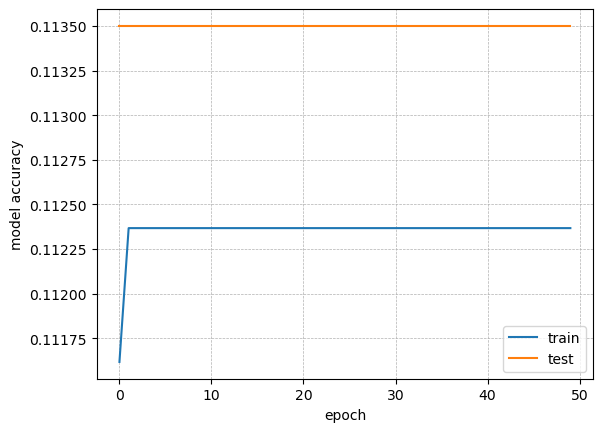

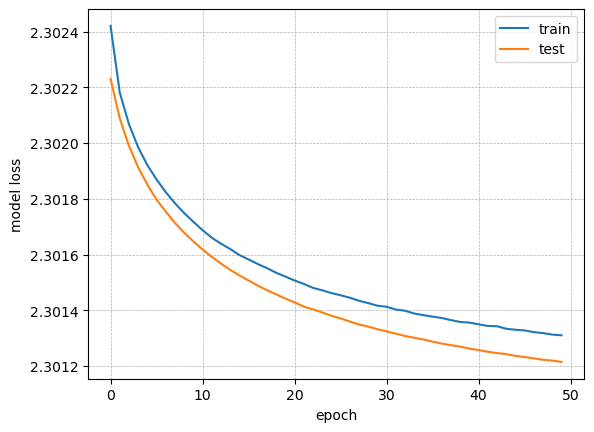

/home/jiahao/anaconda3/envs/tf/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.show()

# print data to file
epochs = range(1, len(history.history['loss']) + 1)
data = {
    'epoch': epochs,
    'loss': history.history['loss'],
    'val_loss': history.history['val_loss'],
    'acc': history.history['acc'],
    'val_acc': history.history['val_acc']
}

df = pd.DataFrame(data)
df.to_csv(f'DATA/optimizer/{opt}.dat', index=False, sep = ' ')

#save model
model_DNN.save(f'DATA/models/DNN/{opt}.h5')

313/313 [==============================] - 0s 858us/step


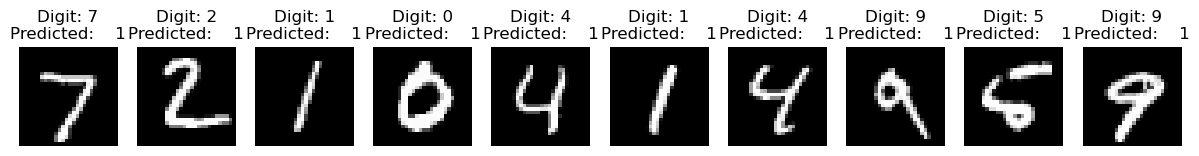

In [13]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()